<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/07-trees/DecisionTrees_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Alexandra Serechenko

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

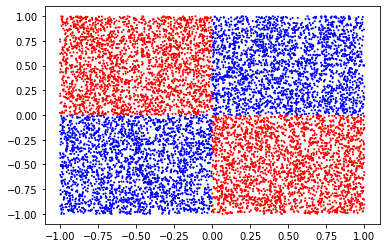

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [8]:
N = 10000

In [9]:
X = np.random.uniform(-1., 1., size=(N, 2))
y = np.asarray([ 0 if bool(x0>=0) == bool(x1>=0) else 1 for x0,x1 in X])

In [10]:
# Fit DecisionTreeClassifier with different max_depth values
min_depth = None
for depth in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X, y)
    
    # Check train accuracy
    train_acc = clf.score(X, y)
    
    # Print depth and corresponding accuracy
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc}")
    
    # If train accuracy > 0.99, store the depth and break
    if train_acc > 0.99 and min_depth is None:
        min_depth = depth
        break

Max Depth: 1, Train Accuracy: 0.5088
Max Depth: 2, Train Accuracy: 0.6122
Max Depth: 3, Train Accuracy: 0.9997


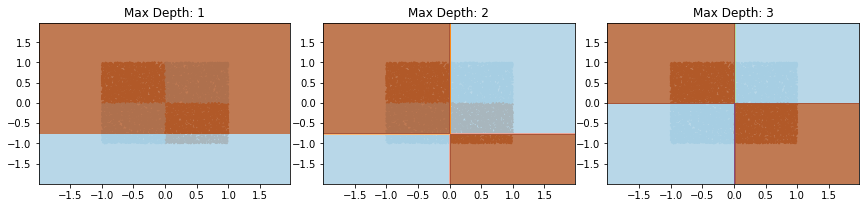

In [11]:
# Plot data with decision boundaries for models with different max_depth
plt.figure(figsize=(12, 8))

for depth in range(1, min_depth + 1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X, y)
    
    # Plot decision boundary
    plt.subplot(3, 3, depth)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=plt.cm.Paired)
    plt.title(f"Max Depth: {depth}")
    
    # Plot decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.tight_layout()
plt.show()

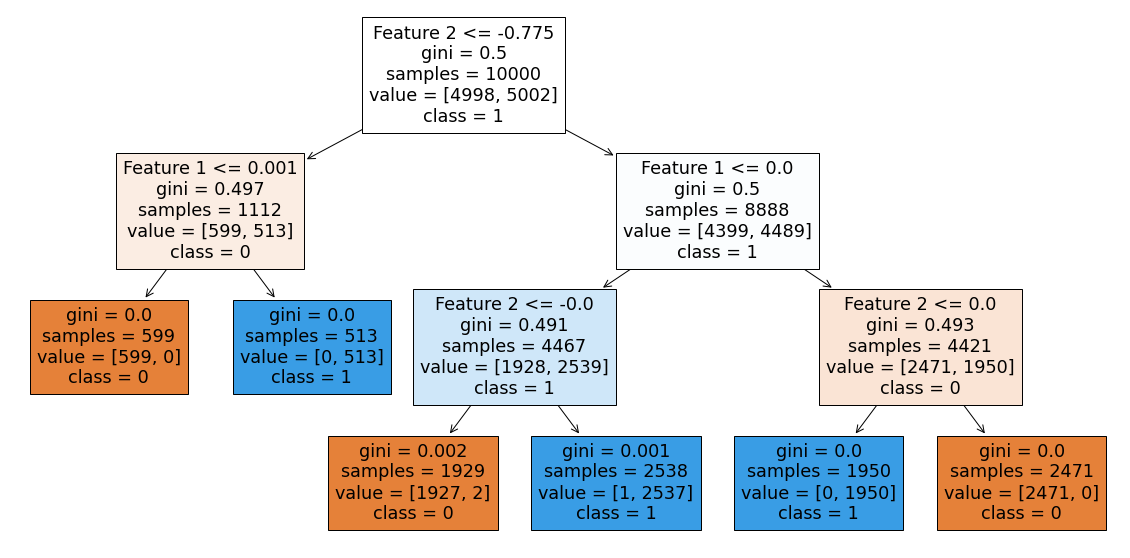

In [12]:
# Plot the tree structure for the model with train accuracy > 0.99
clf = DecisionTreeClassifier(max_depth=min_depth, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 10))
_ = plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['0', '1'])
plt.show()

# Task 2 (3 points)

Consider the following dataset:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

NameError: name 'X_train' is not defined

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [76]:
clf = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={'benign': 1.0, 'malignant': 2.0})

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

In [78]:
pred = clf.predict(X_test)

In [79]:
pred_numerical = [ 0 if x == "benign" else 1 for x in pred ]
y_test_numerical = [ 0 if x == "benign" else 1 for x in y_test ]

In [80]:
print("ROC_AUC score =", roc_auc_score(pred_numerical, y_test_numerical))

ROC_AUC score = 0.9045454545454545


In [81]:
clf.get_depth()

6

In [82]:
depths = [1, 2, 3, 4, 5, 6]
min_samples_leafs = [1, 2, 3, 4, 6, 8, 10, 16, 20, 32]

In [83]:
output = { 
    "First": { "max_depth": 0 , "min_samples_leaf": 0  , "score" : 0},
    "Second": { "max_depth": 0 , "min_samples_leaf": 0  , "score" : 0}
}

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [85]:
y_test_numerical = [ 0 if x == "benign" else 1 for x in y_test ]
for depth in depths:
      for min_samples_leaf in min_samples_leafs:
        tmp_clf =  make_pipeline(
            StandardScaler(),
            DecisionTreeClassifier(max_depth = depth ,min_samples_leaf = min_samples_leaf   , class_weight={'malignant' : 2., 'benign' : 1.})
            )
        tmp_clf.fit(X_train,y_train)
        pred = tmp_clf.predict(X_test)
        pred_numerical = [ 0 if x == "benign" else 1 for x in pred ]
        score  = roc_auc_score(pred_numerical, y_test_numerical)
        if score >= output["First"]["score"]:
          output["First"]["score"] = score
          output["First"]["max_depth"] = depth
          output["First"]["min_samples_leaf"] = min_samples_leaf
        elif score >= output["Second"]["score"]:
          output["Second"]["score"] = score
          output["Second"]["max_depth"] = depth
          output["Second"]["min_samples_leaf"] = min_samples_leaf

In [86]:
print ("first best has a depth of " + str(output["First"]["max_depth"]) + " and a min_samples_leaf of " + str(output["First"]["min_samples_leaf"]) + " and AUC/ROC equal to " + str(output["First"]["score"]) )
print ("Second best has a depth of " + str(output["Second"]["max_depth"]) + " and a min_samples_leaf of " + str(output["Second"]["min_samples_leaf"]) + " and AUC/ROC equal to " + str(output["Second"]["score"]) )

first best has a depth of 6 and a min_samples_leaf of 6 and AUC/ROC equal to 0.9238064791133844
Second best has a depth of 5 and a min_samples_leaf of 1 and AUC/ROC equal to 0.9045454545454545


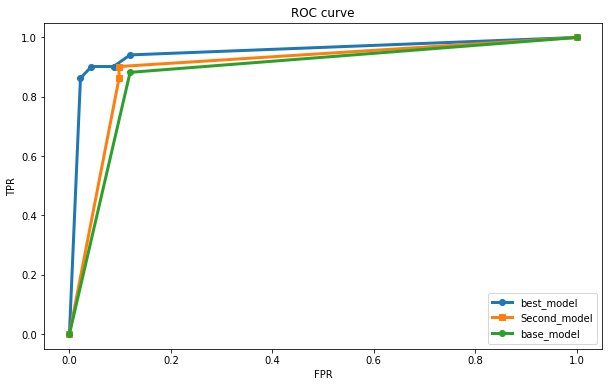

In [87]:
model1 = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth = output["First"]["max_depth"] ,min_samples_leaf = output["First"]["min_samples_leaf"]  , class_weight={'malignant' : 2., 'benign' : 1.})
        )
model1.fit(X_train, y_train)
predictions1 = model1.predict_proba(X_test)
fpr1, tpr1, _ = roc_curve(y_test_numerical, predictions1[:,1])

model2 = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth = output["Second"]["max_depth"] ,min_samples_leaf = output["Second"]["min_samples_leaf"]  , class_weight={'malignant' : 2., 'benign' : 1.})
        )
model2.fit(X_train, y_train)
predictions2 = model2.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test_numerical, predictions2[:,1])

model3 = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})
        
model3.fit(X_train, y_train)
predictions3 = model3.predict_proba(X_test)
fpr3, tpr3, _ = roc_curve(y_test_numerical, predictions3[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1,'o-', linewidth=3, label='best_model')
plt.plot(fpr2, tpr2,'s-', linewidth=3, label='Second_model')
plt.plot(fpr3, tpr3,'o-',linewidth=3, label='base_model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()